In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from scipy import stats

from scipy.optimize import curve_fit

def func(x, a, b):
    return a*x + b

In [2]:
df = pd.read_excel('test2.xlsx')
p5n4 = df.loc[ (df['#of N'] == 4) & (df['s'] == 'p5') ,  ['s','#of N','M','G_Cl', 'G_O','G_OH','G_OOH','OVER_Cl','Over_OER']]
p5n3 = df.loc[ (df['#of N'] == 3) & (df['s'] == 'p5') ,  ['s','#of N','M','G_Cl', 'G_O','G_OH','G_OOH','OVER_Cl','Over_OER']]
p5n2 = df.loc[ (df['#of N'] == 2) & (df['s'] == 'p5') ,  ['s','#of N','M','G_Cl', 'G_O','G_OH','G_OOH','OVER_Cl','Over_OER']]
p5n1 = df.loc[ (df['#of N'] == 1) & (df['s'] == 'p5') ,  ['s','#of N','M','G_Cl', 'G_O','G_OH','G_OOH','OVER_Cl','Over_OER']]
p5n0 = df.loc[ (df['#of N'] == 0) & (df['s'] == 'p5') ,  ['s','#of N','M','G_Cl', 'G_O','G_OH','G_OOH','OVER_Cl','Over_OER']]
p5n2t = df.loc[ (df['#of N'] == '2-t') & (df['s'] == 'p5') ,  ['s','#of N','M','G_Cl', 'G_O','G_OH','G_OOH','OVER_Cl','Over_OER']]

p5n3

,s,#of N,M,G_Cl,G_O,G_OH,G_OOH,OVER_Cl,Over_OER
180,p5,3,Ru,-0.01,0.55,0.02,2.97,1.37,1.19
181,p5,3,Mn,0.72,1.75,0.75,3.78,0.64,0.80
182,p5,3,Fe,0.77,1.65,0.79,3.73,0.59,0.85
183,p5,3,Co,0.85,2.42,1.09,3.88,0.51,0.23
184,p5,3,Ni,1.61,1.17,2.03,4.76,0.25,2.36
185,p5,3,Cu,0.90,0.62,0.37,4.84,0.46,2.99
186,p5,3,Tc,-0.10,-0.83,-0.28,NaN,1.46,NaN
187,p5,3,Rh,0.59,2.37,0.88,3.72,0.77,0.26
188,p5,3,Pd,1.91,4.57,2.41,4.95,0.55,1.18
189,p5,3,Ag,1.06,1.31,0.55,4.91,0.30,2.37


In [3]:
#p5n3=p5n3.drop(185)
#p5n3=p5n3.drop(184)
#p5n3=p5n3.drop(189)

p5 = [p5n4,p5n3,p5n2,p5n2t,p5n1,p5n0]
for i in p5 :
    a = list(i['G_OH']-1.23)
    b =list(i['G_O']-i['G_OH']-1.23)
    c = list(i['G_OOH']-i['G_O']-1.23)
    d = list(4.92-i['G_OOH']-1.23)

    i['Over_OER'] = np.max([a,b,c,d],axis=0)
p5n2t

,s,#of N,M,G_Cl,G_O,G_OH,G_OOH,OVER_Cl,Over_OER
310,p5,2-t,Ru,-0.38,-0.11,-0.45,2.35,1.74,1.34
311,p5,2-t,Mn,0.48,1.27,0.59,3.66,0.88,1.16
312,p5,2-t,Fe,0.57,1.30,0.74,3.72,0.79,1.19
313,p5,2-t,Co,0.78,1.97,0.92,3.75,0.58,0.55
314,p5,2-t,Ni,1.27,3.58,1.72,4.51,0.09,0.63
315,p5,2-t,Cu,1.52,4.27,2.09,4.83,0.16,0.95
316,p5,2-t,Tc,NaN,NaN,NaN,NaN,NaN,NaN
317,p5,2-t,Rh,0.56,2.01,0.85,3.69,0.80,0.45
318,p5,2-t,Pd,1.55,4.04,2.08,4.80,0.19,0.85
319,p5,2-t,Ag,1.80,4.69,2.48,4.92,0.44,1.25


# Solvation 고려

In [4]:
p5 = [p5n4,p5n3,p5n2,p5n2t,p5n1,p5n0]

for i in p5 :
    i['G_OOH'] = i['G_OOH'] - 0.3
    i['G_OH'] = i['G_OH'] - 0.3
    
    a = list(i['G_OH']-1.23)
    b =list(i['G_O']-i['G_OH']-1.23)
    c = list(i['G_OOH']-i['G_O']-1.23)
    d = list(4.92-i['G_OOH']-1.23)

    i['Over_OER'] = np.max([a,b,c,d],axis=0)



In [5]:
drop_M = ['Tc','Re','Os','Mo',"W",'Ru']
p5_drop = []
for i in p5 :
    for j in drop_M :
        i = i[i['M'] != j]
    p5_drop.append(i)
        
p5_drop[0]

,s,#of N,M,G_Cl,G_O,G_OH,G_OOH,OVER_Cl,Over_OER
163,p5,4,Mn,0.80,1.64,0.59,3.56,0.56,0.69
164,p5,4,Fe,0.86,1.77,0.67,3.48,0.50,0.48
165,p5,4,Co,1.15,2.77,1.06,3.79,0.21,0.48
166,p5,4,Ni,1.83,4.05,1.93,4.51,0.47,0.89
167,p5,4,Cu,1.90,4.50,2.03,4.56,0.54,1.24
169,p5,4,Rh,1.03,2.78,1.01,3.80,0.33,0.54
170,p5,4,Pd,2.07,4.80,2.24,4.65,0.71,1.33
171,p5,4,Ag,2.06,4.97,2.41,4.62,0.70,1.33
174,p5,4,Ir,1.08,2.41,1.04,3.88,0.28,0.24
175,p5,4,Pt,2.03,4.36,2.21,4.68,0.67,0.98


In [6]:
def climbvolcano(TM) :
    plt.figure(1,figsize=(15,10))
    ax = plt.subplot(111)

    x = []
    y = []

    x_fit = np.arange(0.5,2,0.01)
    y_fit1 = x_fit-1.36
    y_fit2 = 1.36-x_fit
    y_fit = np.maximum(y_fit1,y_fit2)
    ax.plot(x_fit,-y_fit,c='black',linewidth=2) 
    
    c = ['#ff124f','#fe75fe','#44D7BE','#00b3fe','#7a04eb','#120458']
    l = [TM+'N$_4$C',TM+'N$_3$C',TM+'N$_2$C',TM+'N$_2$C-t',TM+'N$_1$C',TM+'N$_0$C']
    j = 0
    
    arrowx = list()
    arrowy = list()
    
    arrowx_left = list()
    arrowx_right = list()
    

    
    
    for i in p5_drop :
        
        Gcl = float(i.loc[i['M']== TM, 'G_Cl'])
        η1 = Gcl - 1.36
        η2 = 1.36 - Gcl
        η = np.maximum(η1,η2)
        
        ax.scatter(Gcl,-η,c = c[j],label = l[j],s=300,alpha=0.5)
        
        j = j+1
        
        arrowx.append(Gcl)
        arrowy.append(-η)
        
    for i in range(len(arrowx)) :
        if arrowx[i] < 1.36 :
            arrowx_left.append(arrowx[i])

        if arrowx[i] >= 1.36 :
            arrowx_right.append(arrowx[i])


    if len(arrowx_left) != 0 :        
        arrowx_left = np.array(sorted(arrowx_left))
        arrowy_left = 1.36-arrowx_left
    
    if len(arrowx_right) != 0 :
        arrowx_right = np.array(sorted(arrowx_right)[::-1])
        #print(arrowx_right)
        arrowy_right = arrowx_right-1.36
                                
                                
    arrowy_min = max(arrowy)
                                
    if len(arrowx_left) != 0 and len(arrowx_right) != 0 :
        arrowx_min = arrowx[arrowy.index(arrowy_min)]
    
        arrowx_left = np.append(arrowx_left,arrowx_min)
        arrowy_left = np.append(arrowy_left,arrowy_min)
    
        arrowx_right = np.append(arrowx_right,arrowx_min)
        arrowy_right = np.append(arrowy_right,arrowy_min)
    
    if len(arrowx_left) != 0 :     
        temp1 = arrowx_left[0]
        temp2 = -arrowy_left[0]
        for i in range(0,len(arrowx_left)) :
            if temp1 != arrowx_left[i] :
            #print(arrowx_left[i], -arrowy_left[i])
                ann = ax.annotate("",
                                  xy=(arrowx_left[i], -arrowy_left[i]), xycoords='data',
                                  xytext=(temp1, temp2), textcoords='data',
                                  size=40, va="center", ha="center",
                                  arrowprops=dict(lw=2,arrowstyle="-|>",connectionstyle="arc3,rad=-1",fc="w")
                                 )
            temp1, temp2 = arrowx_left[i], -arrowy_left[i]
            
    if len(arrowx_right) != 0 :     
        temp1 = arrowx_right[0]
        temp2 = -arrowy_right[0]
        for i in range(0,len(arrowx_right)) :
            #print(arrowx_right[i], -arrowy_right[i])
            if temp1 != arrowx_right[i] :
                ann = ax.annotate("",
                                  xy=(arrowx_right[i], -arrowy_right[i]), xycoords='data',
                                  xytext=(temp1, temp2), textcoords='data',
                                  size=40, va="center", ha="center",
                                  arrowprops=dict(lw=2,arrowstyle="-|>",connectionstyle="arc3,rad=+1",fc="w")
                                 )
            temp1, temp2 = arrowx_right[i], -arrowy_right[i]
        
        
    ax.legend(fontsize=15)
        
    plt.xlabel('ΔG$_{Cl}$',fontsize=30)
    plt.ylabel('-η$_{CER}$',fontsize=30)
    
    ax.tick_params(axis='both', which='major', labelsize=20)
    plt.show()




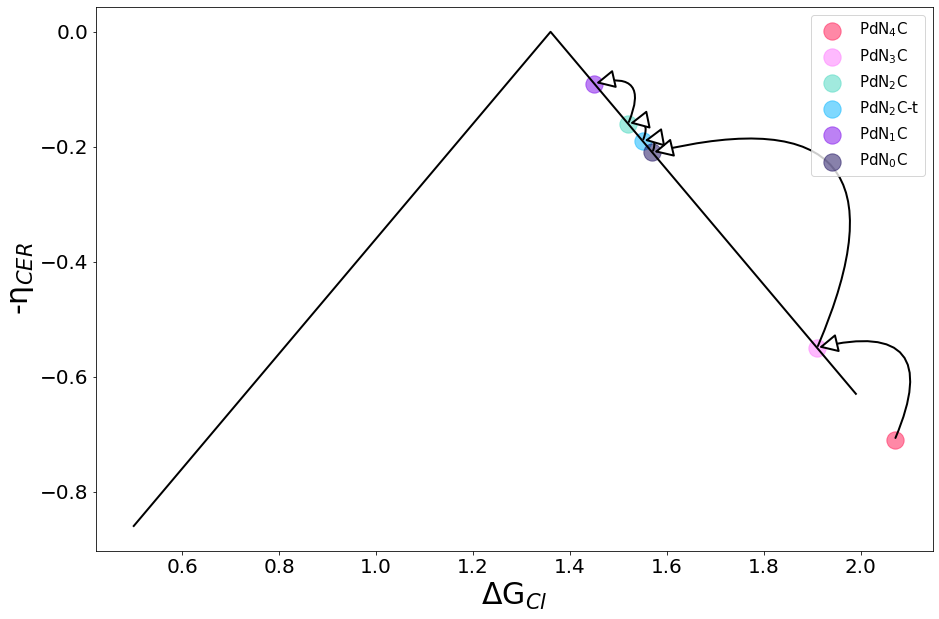

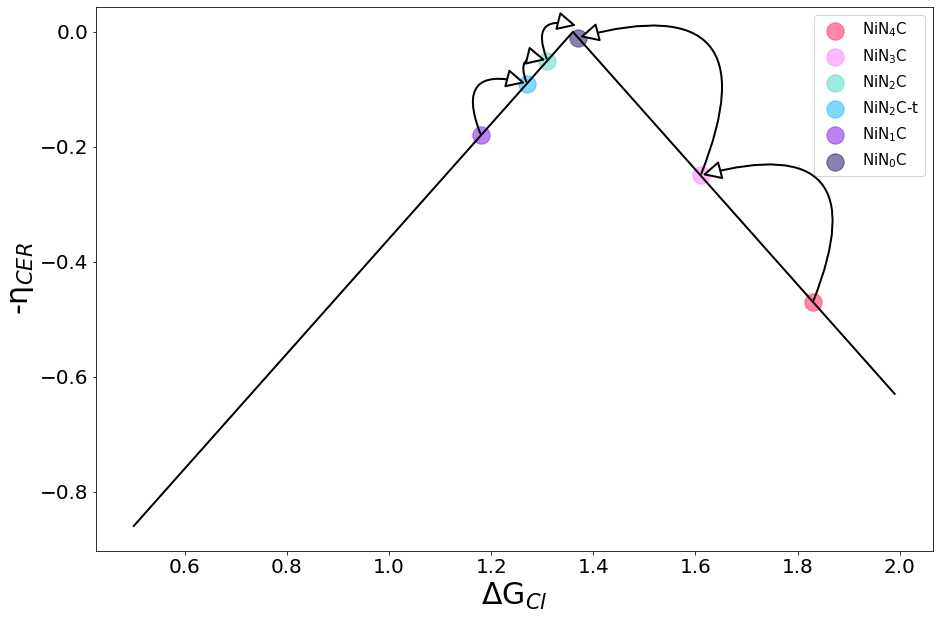

In [7]:
climbvolcano('Pd')
climbvolcano('Ni')

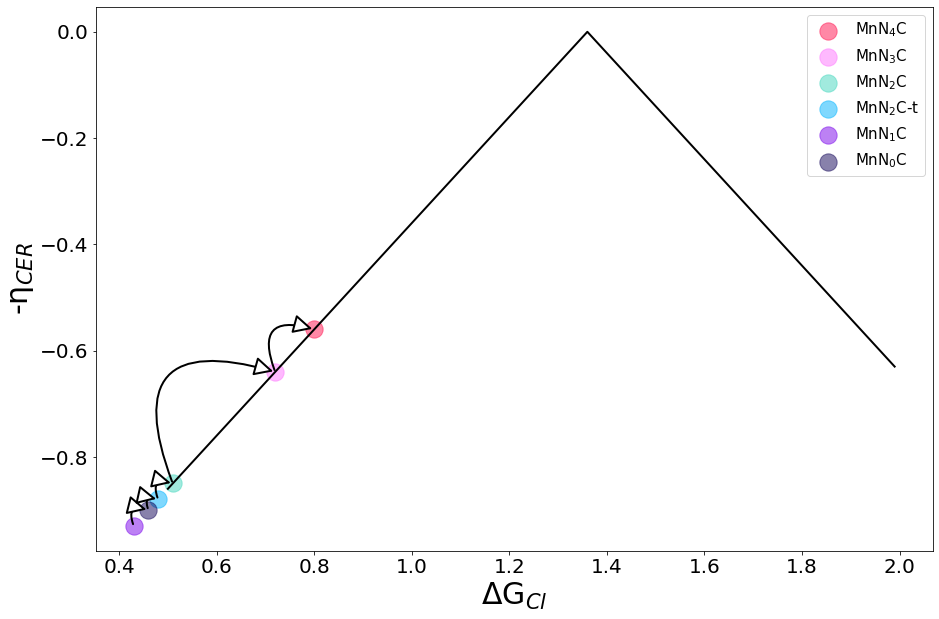

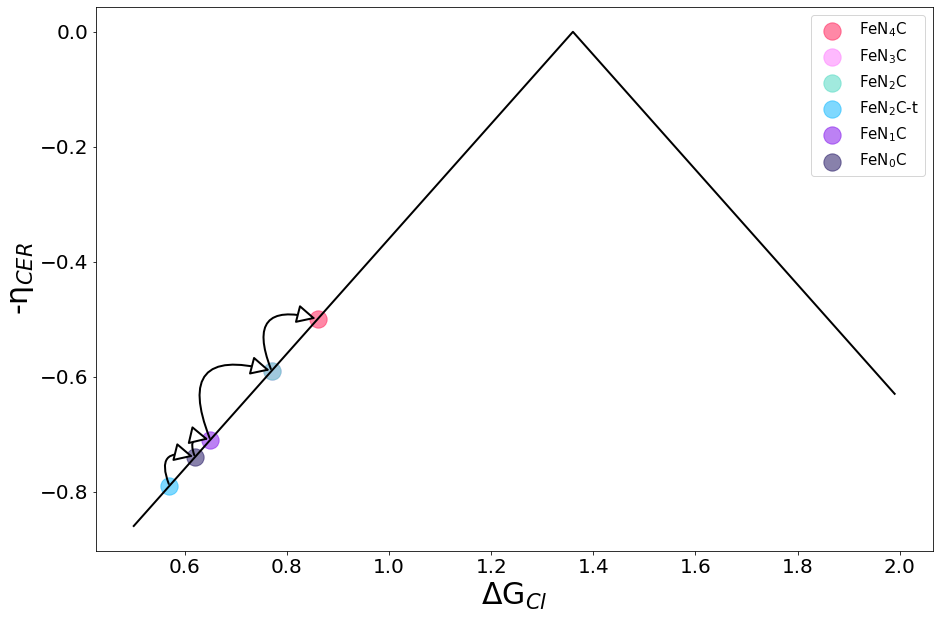

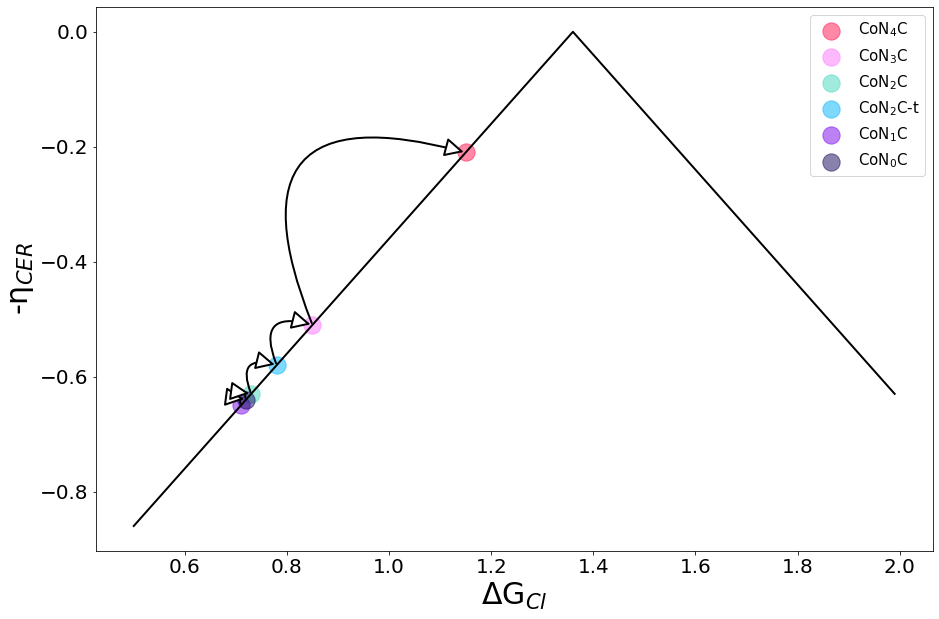

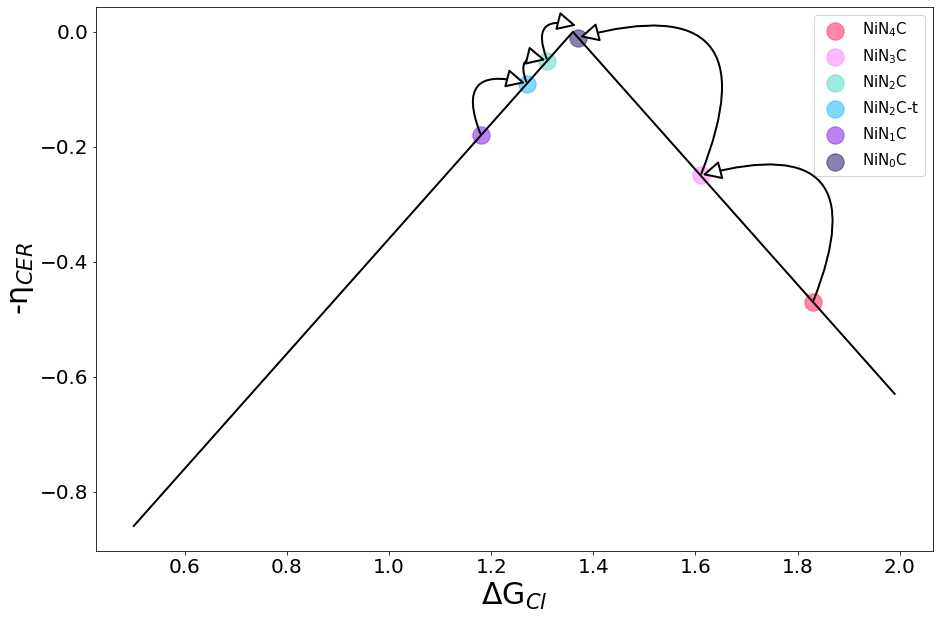

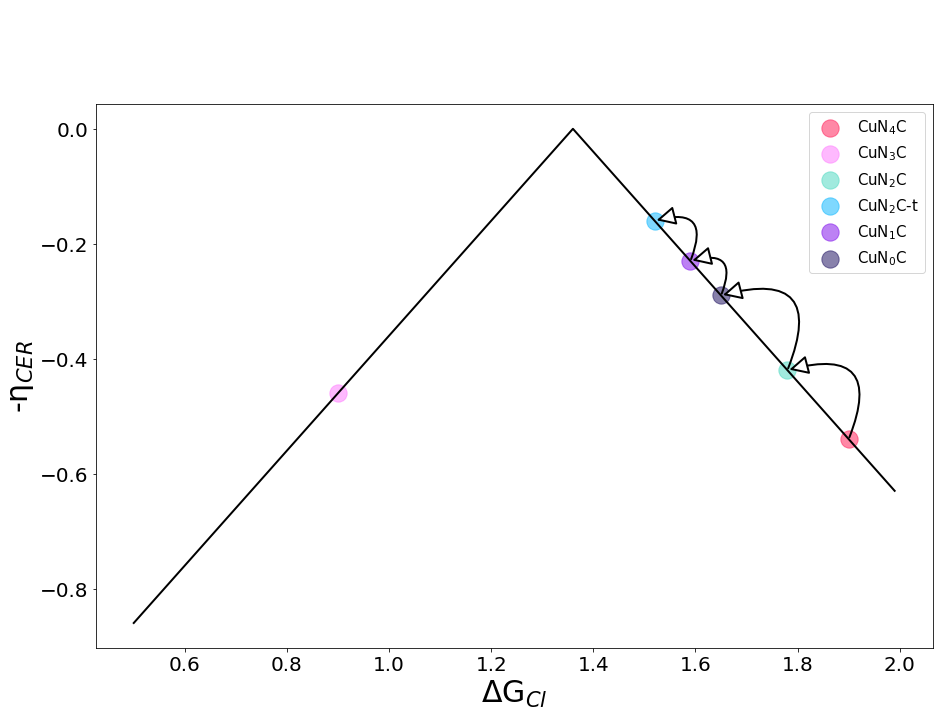

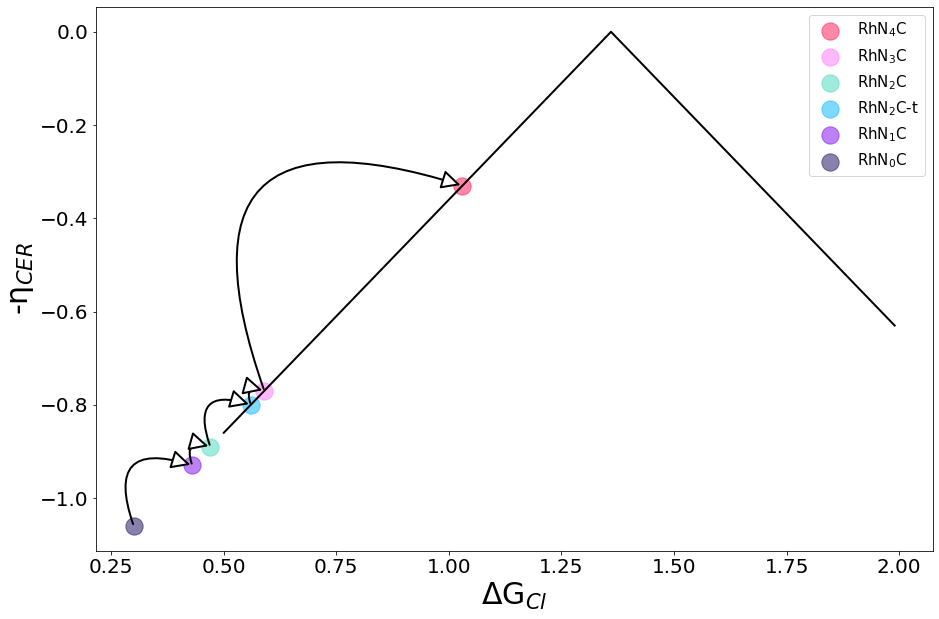

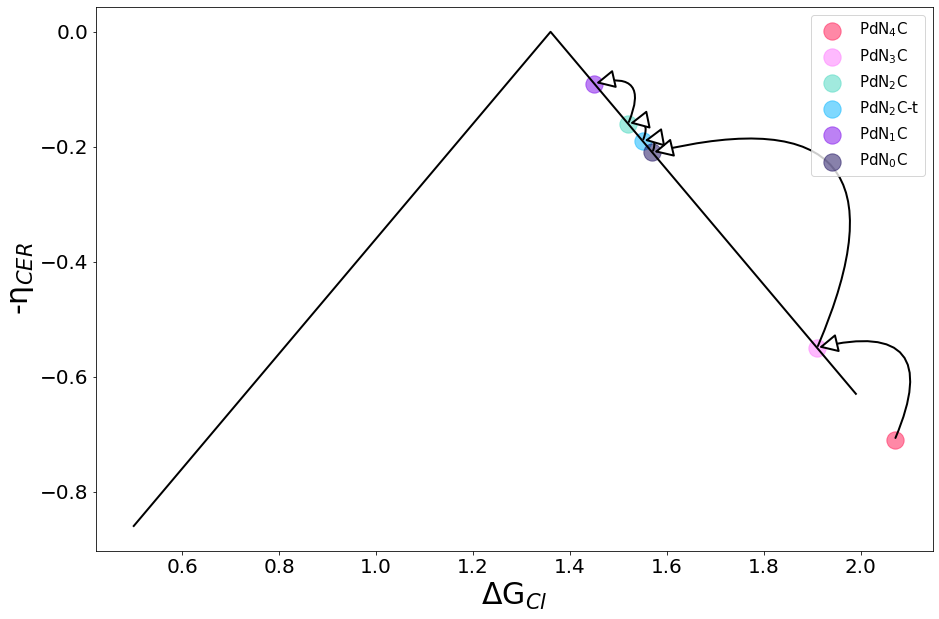

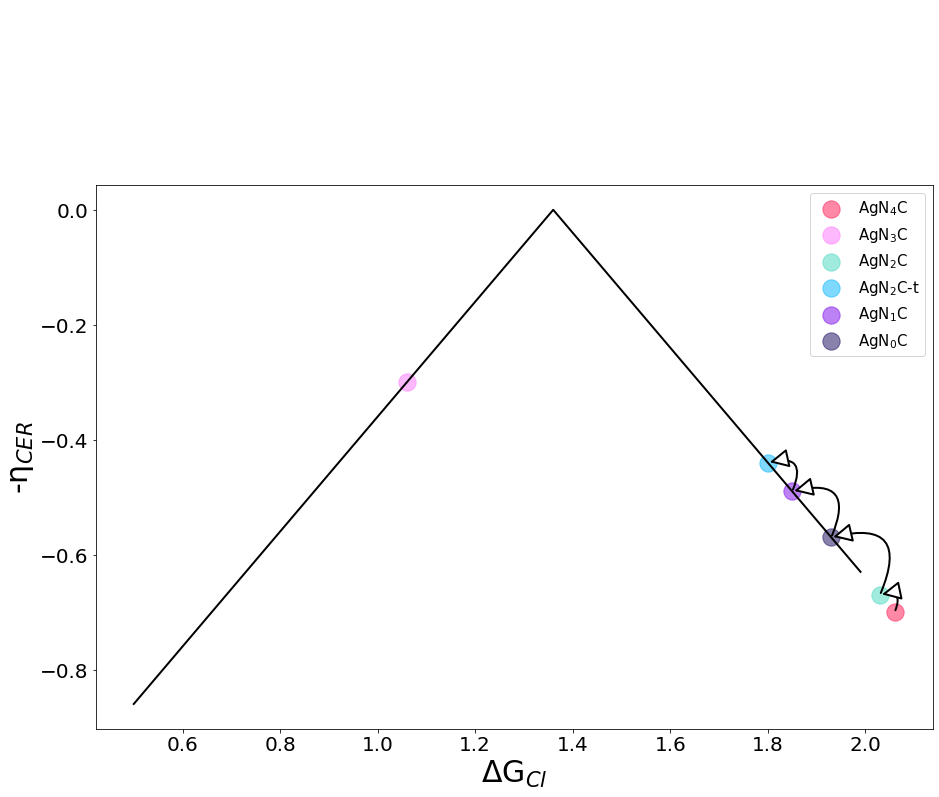

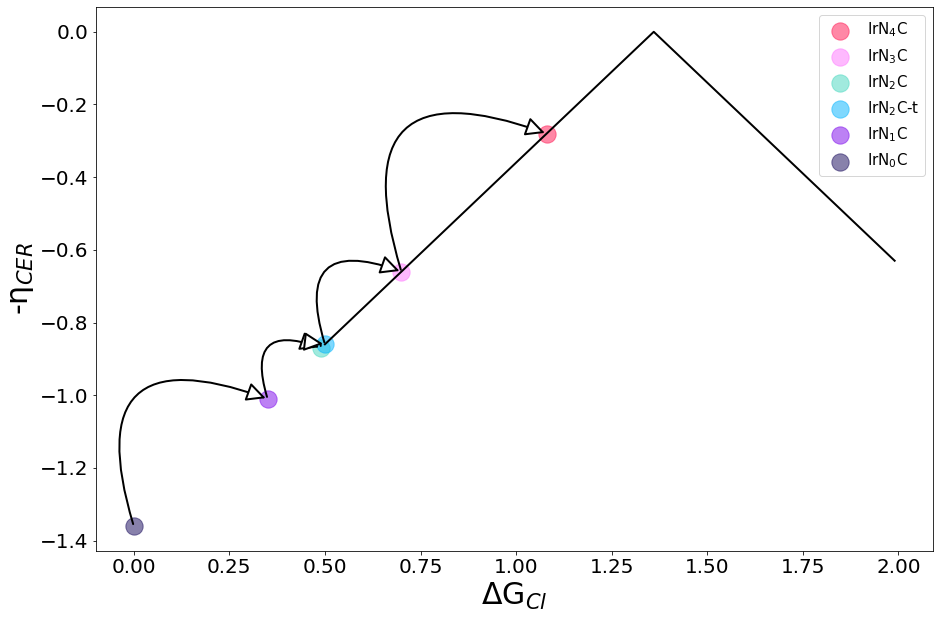

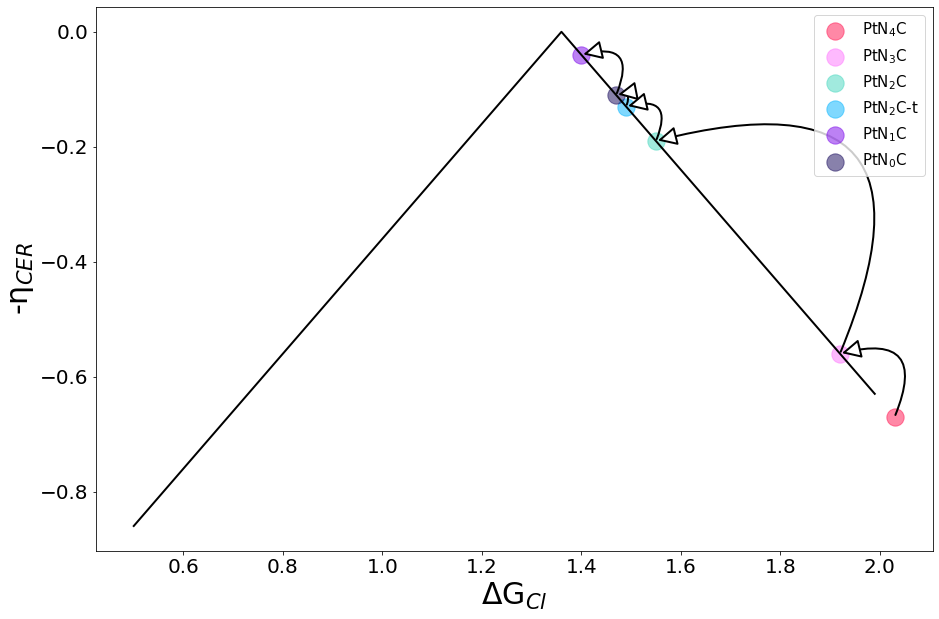

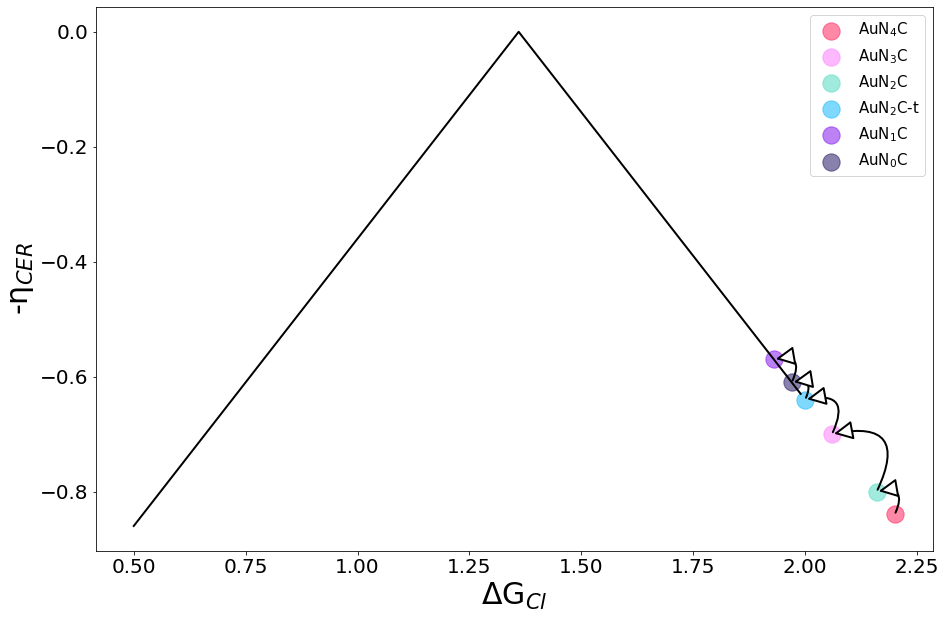

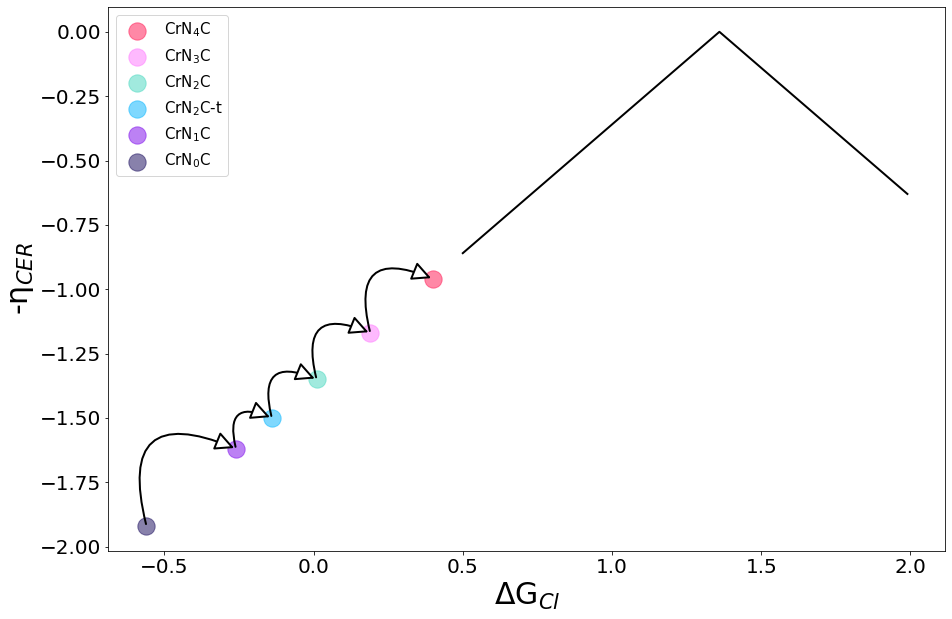

In [8]:
TM_list = list(p5_drop[0]['M'])
for i in TM_list :
    climbvolcano(i)

In [9]:
def NGplot(TM,cnum) :
    plt.figure(1,figsize=(15,10))
    
    c = ['#ff124f','#ff00a0','#fe75fe','#7a04eb','#120458','#00b3fe','#44D7BE']
    Gcllist = list()
    Nlist = list()
    j = 0

    mark = '^'
    for i in p5_drop :
        temp = (i.loc[i['M']== TM, '#of N']).values[0]
        if temp == '2-t':
            type = 'trans'
            temp = '2'
            mark = 'o'
        N = int(temp)
        
        Gcl= (i.loc[i['M']== TM, 'G_Cl']).values[0]
        
        Gcllist.append(Gcl)
        Nlist.append(N)
        
        
        j = j+1
        mark = '^'
    
    Nlist2 = list(Nlist)
    Gcllist2 = list(Gcllist)
    del Nlist[3]
    del Gcllist[3]
    del Nlist2[2]
    del Gcllist2[2]
    
    Nlist2= Nlist2[1:4]
    Gcllist2 = Gcllist2[1:4]
    
    plt.scatter(Nlist,Gcllist,color=c[cnum],label = TM, marker=mark, s=300,alpha=0.5)
    plt.scatter(Nlist2[1],Gcllist2[1],color=c[cnum],label = TM+',trans', marker='o', s=300,alpha=0.5)
    
    plt.plot(Nlist,Gcllist,'--',color=c[cnum])
    plt.plot(Nlist2,Gcllist2,'--',color=c[cnum])
    
    listOf_Xticks = np.arange(0, 5, 1)
    plt.xticks(listOf_Xticks,fontsize=20)
    plt.yticks(fontsize=20)
    plt.legend(fontsize=15)
    
    plt.xlabel('N',fontsize=30)
    plt.ylabel('ΔG$_{Cl}$ (eV)',fontsize=30)
        
    plt.axhline(y=1.36, color='black', linestyle='--',linewidth=2)
    plt.text(3.4,1.3,'optimal value',fontsize=20)

In [27]:
def NGplot2(TM,cnum) :
    plt.figure(1,figsize=(15,10))
    
    c = ['#ff124f','#ff00a0','#fe75fe','#7a04eb','#120458','#00b3fe','#44D7BE']
    Gcllist = list()
    j = 0
    Nlist = [4,3,2,1,0]
    
    mark = '^'
    for i in p5_drop :
        temp = (i.loc[i['M']== TM, '#of N']).values[0]
        if temp == '2-t':
            type = 'trans'
            temp = '2'
            mark = 'o'
        
        Gcl= (i.loc[i['M']== TM, 'G_Cl']).values[0]
        
        Gcllist.append(Gcl)
                
        j = j+1
        mark = '^'
    
    
    if Gcllist[2] > Gcllist[3] :
        del Gcllist[2]
    else :
        del Gcllist[3]
            
    plt.scatter(Nlist,Gcllist,color=c[cnum],label = TM, marker=mark, s=300,alpha=0.5)
    plt.plot(Nlist,Gcllist,'--',color=c[cnum])
    
    listOf_Xticks = np.arange(0, 5, 1)
    plt.xticks(listOf_Xticks,fontsize=20)
    plt.yticks(fontsize=20)
    plt.legend(fontsize=15)
    
    plt.xlabel('N',fontsize=30)
    plt.ylabel('ΔG$_{Cl}$ (eV)',fontsize=30)
        
    plt.axhline(y=1.36, color='black', linestyle='--',linewidth=2)
    plt.text(3.4,1.3,'optimal value',fontsize=20)
    

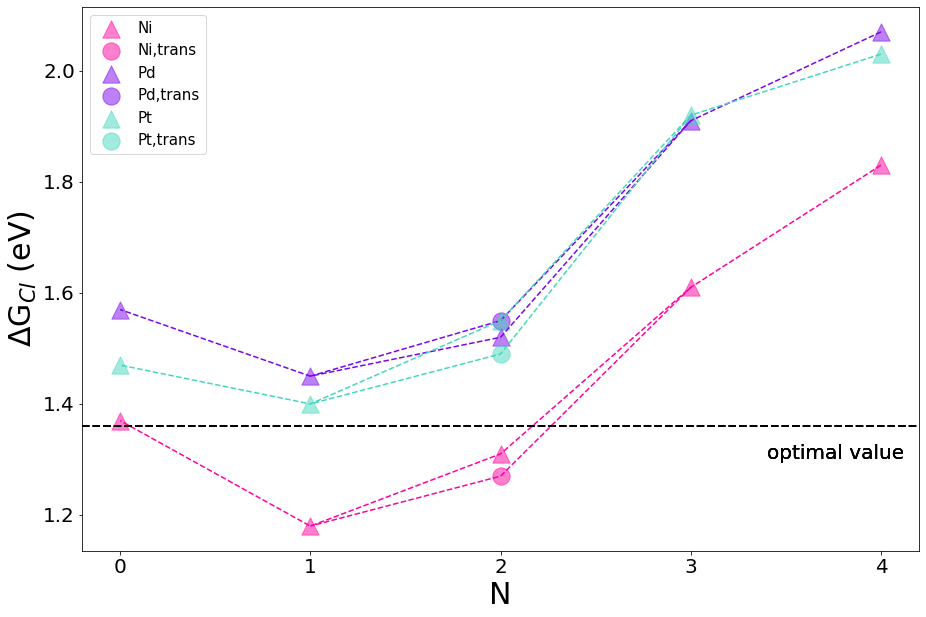

In [16]:
NGplot('Ni',1)
NGplot('Pd',3)
NGplot('Pt',6)

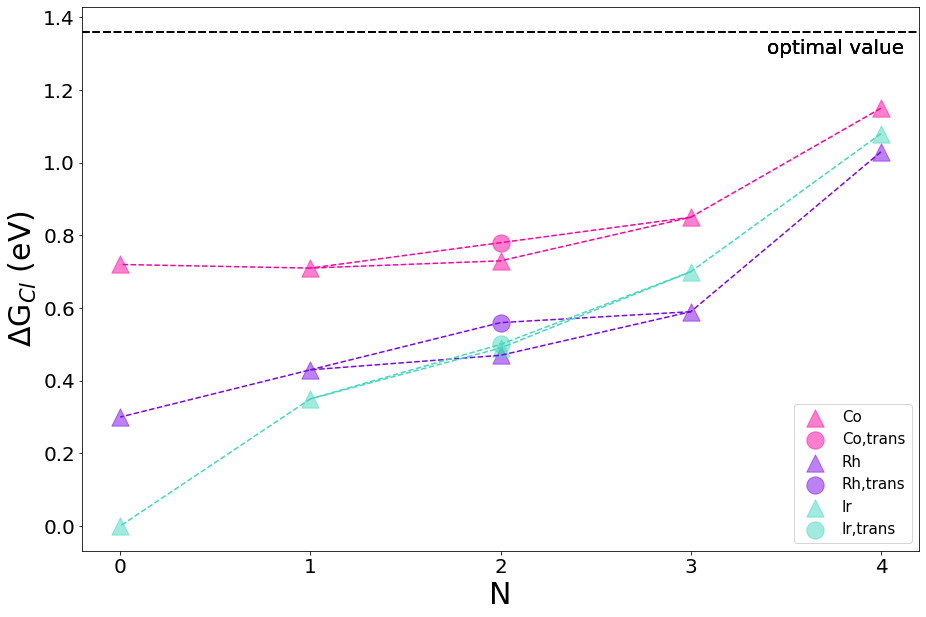

In [17]:
NGplot('Co',1)
NGplot('Rh',3)
NGplot('Ir',6)

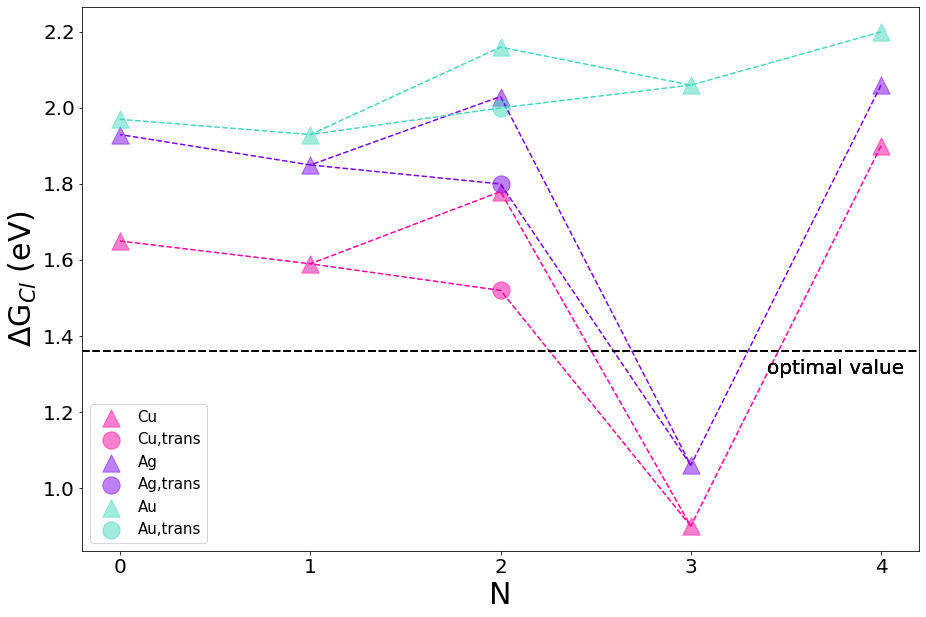

In [18]:
NGplot('Cu',1)
NGplot('Ag',3)
NGplot('Au',6)

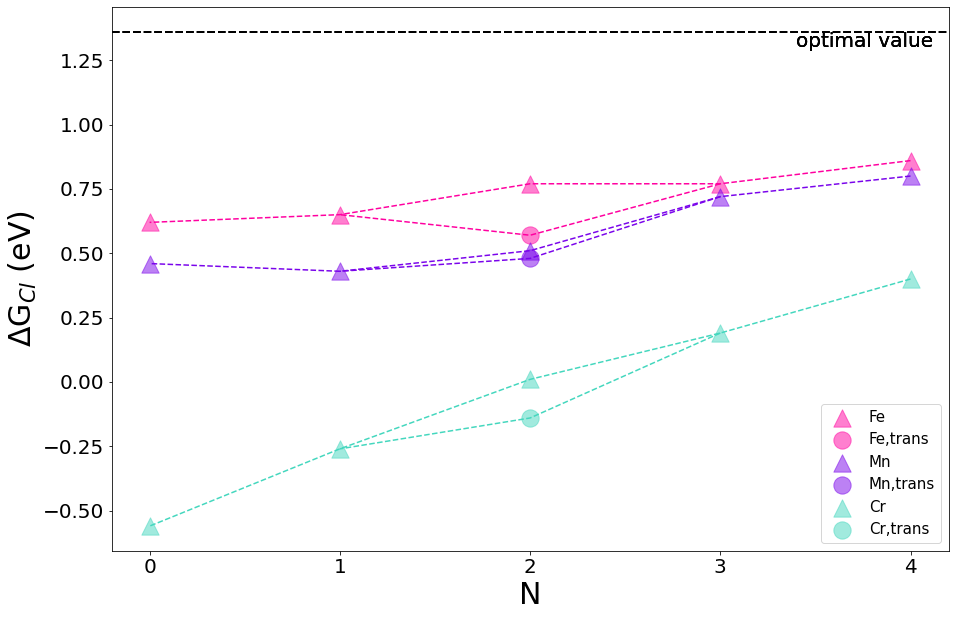

In [19]:
NGplot('Fe',1)
NGplot('Mn',3)
NGplot('Cr',6)

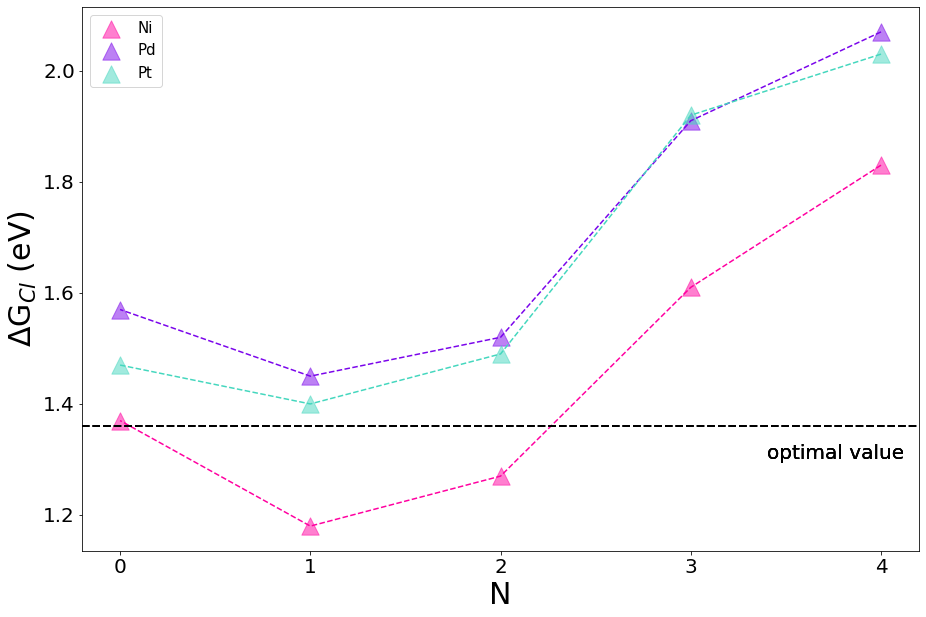

In [28]:
NGplot2('Ni',1)
NGplot2('Pd',3)
NGplot2('Pt',6)

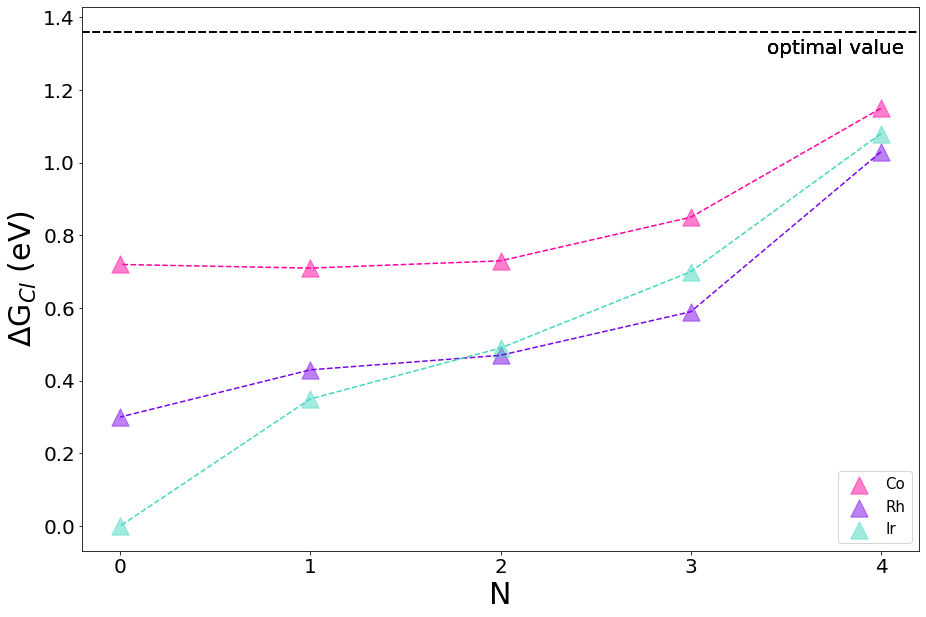

In [29]:
NGplot2('Co',1)
NGplot2('Rh',3)
NGplot2('Ir',6)

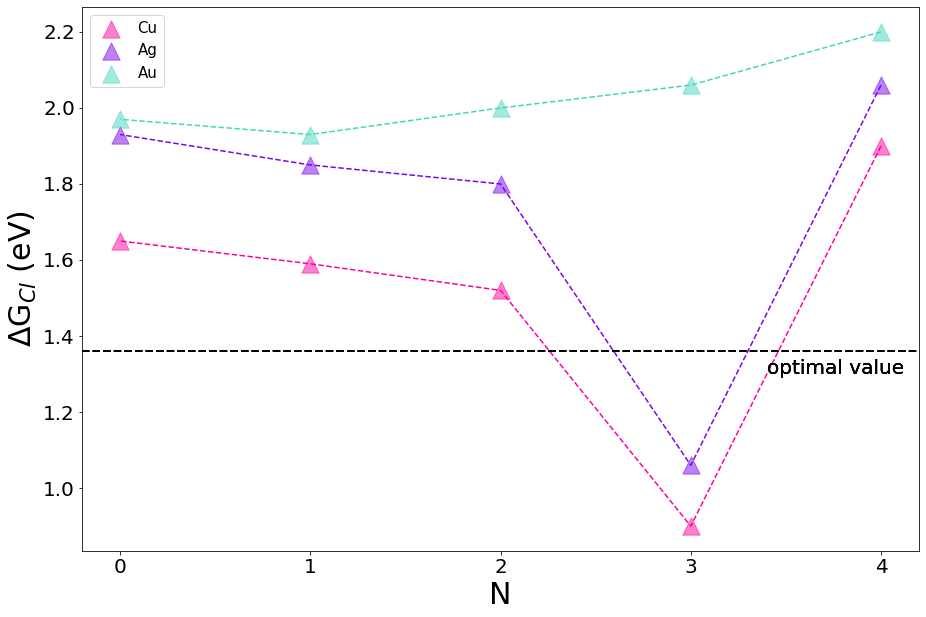

In [30]:
NGplot2('Cu',1)
NGplot2('Ag',3)
NGplot2('Au',6)

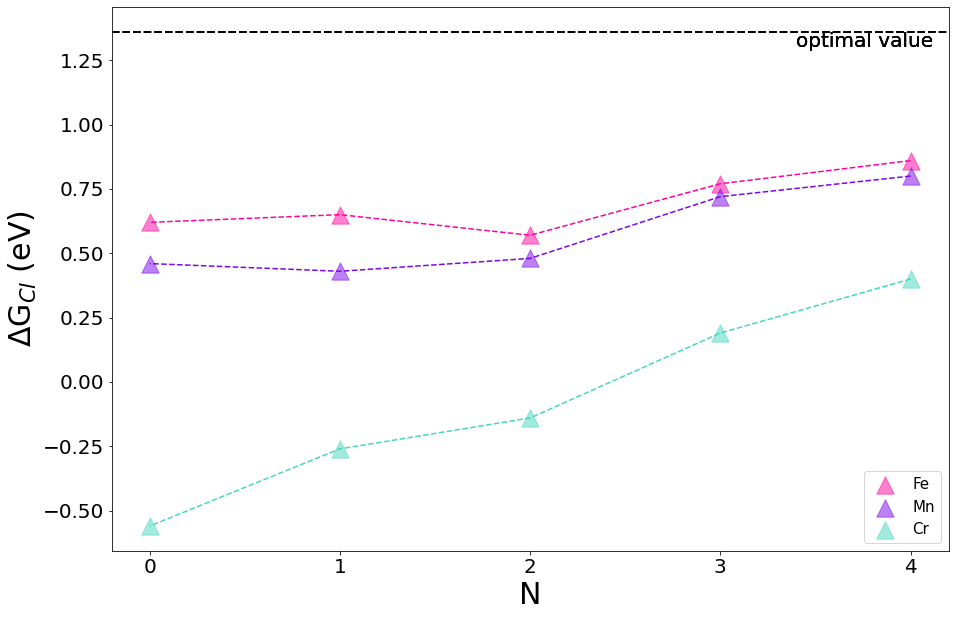

In [31]:
NGplot2('Fe',1)
NGplot2('Mn',3)
NGplot2('Cr',6)